In [1]:
%load_ext autoreload
%autoreload 2

In [22]:
import numpy as np
import matplotlib.pyplot as plt

import SD_functions as SDF
import scipy.stats
import pandas as pd
import seaborn as sns
import responseModel as RM

pi=np.pi
r2d,d2r = 180/pi,pi/180

n_bns=91
bns = np.linspace(-90,90,n_bns)
r_bns = np.linspace(-pi,pi,n_bns)
pal = ['k','c']
mdl_fun ='DoVM' # can also use 'DoG' to compare with previous work
n_subj,n_trial = 30,360

# Section 1: Simulate without history independent biases

In [3]:
do_cb,do_oblique = 0,0
M0 = RM.run_simulation(20000,kappa=8,p_same=0.8,do_cb=do_cb,do_oblique=do_oblique)

In [4]:
nb_use = (-1,1,0)
S0 = RM.summarize_sim(*M0,get_vis=1,nb_run=nb_use,fit_typ=mdl_fun,)

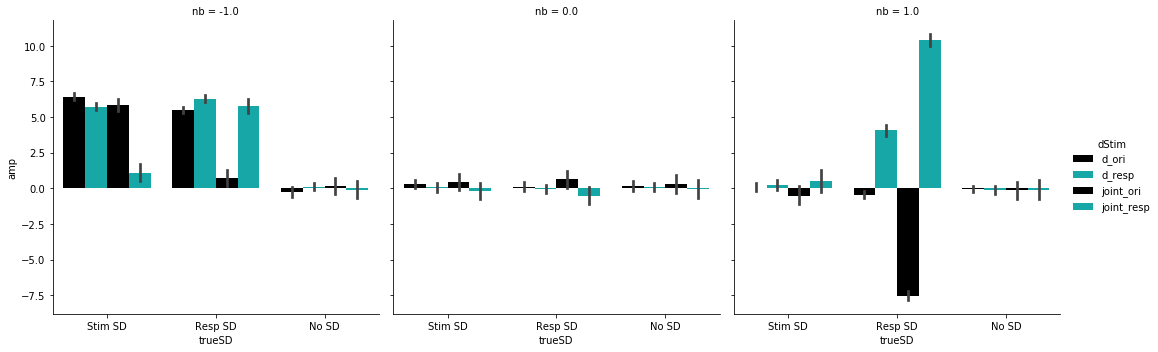

ignoring nan values!


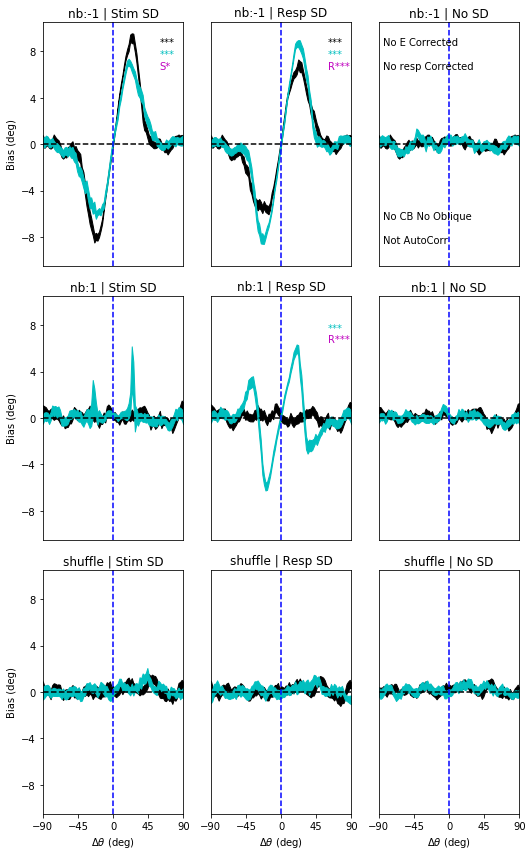

In [5]:
sns.catplot(data=S0[0],x='trueSD',hue='dStim',col='nb',y='amp',kind='bar',palette=pal,ci=68)
plt.show()

ann = (0,0,0,do_cb,do_oblique)
RM.vis_bias(S0[1],nb_use,stats=S0[0],ann=ann,yl=10.5)

## Box 1: why do we get N+1 artifact?
- here we explore what gives rise to the N+1 artifact. For simplicity and to demonstrate the two are unrelated, we do this description before introducing cardinal bias

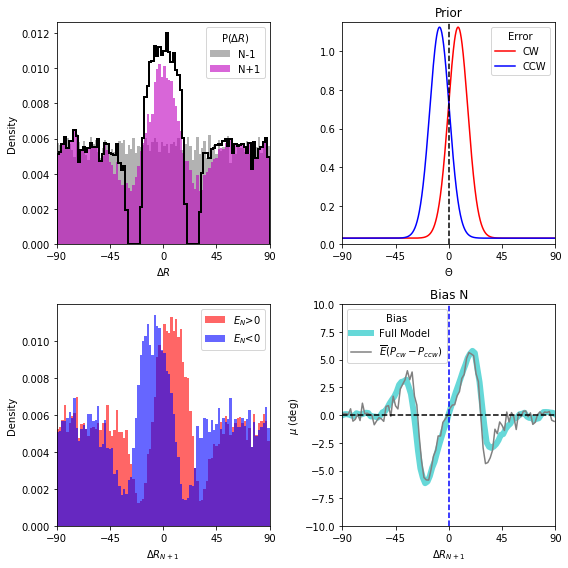

In [7]:
i=1 # what gives rise to the underlying bias (stim, resp, none)
overlap=3
n_step = 1000
s_0 = np.linspace(0,180,n_step)
kappa_prior = 8*1.5
p_same = 0.8
al=0.6

E_use = M0[2]
d_resp = RM.ori_wrap(SDF.get_nb(-1,M0[1][i],0)-M0[0])
d_resp_future = RM.ori_wrap(SDF.get_nb(1,M0[1][i],0)-M0[0])
d_resp_future_stim_bias = RM.ori_wrap(SDF.get_nb(1,M0[1][0],0)-M0[0])
resp_cur_trial = M0[2][i]>0

bns_c = bns[:-1] + (bns[1]-bns[0])/2
this_bias =  SDF.do_bining(bns,overlap,d_resp,E_use[i]*d2r*2,'circ_mean')/d2r/2
this_bias_future =  SDF.do_bining(bns,overlap,d_resp_future,E_use[i]*d2r*2,'circ_mean')/d2r/2
this_bias_future_cw =  SDF.do_bining(bns,overlap,d_resp_future[resp_cur_trial],E_use[i][resp_cur_trial]*d2r*2,'circ_mean')/d2r/2
this_bias_future_ccw =  SDF.do_bining(bns,overlap,d_resp_future[~resp_cur_trial],E_use[i][~resp_cur_trial]*d2r*2,'circ_mean')/d2r/2
mE = np.mean(np.abs(E_use[1]))

plt.figure(figsize=(8,8))
plt.subplot(2,2,2)
prior_resp0 = RM.cf(s_0,90+mE,kappa=kappa_prior,p_same=p_same)
prior_resp1 = RM.cf(s_0,90-mE,kappa=kappa_prior,p_same=p_same)
plt.plot(s_0-90,prior_resp0,'r',label='CW')
plt.plot(s_0-90,prior_resp1,'b',label='CCW')
plt.legend(title='Error')
plt.title('Prior')
SDF.d_plot(0,0,-90)
_yl = [0,1.15]
plt.plot([0,0],_yl,'k--')
plt.ylim(_yl)
plt.xlabel('$\Theta$')


plt.subplot(2,2,1)
plt.hist(d_resp,bns,label='N-1',histtype='stepfilled',color='gray',density=1,alpha=al)
plt.hist(d_resp_future,bns,label='N+1',histtype='stepfilled',color='m',density=1,alpha=al)
plt.hist(d_resp_future_stim_bias,bns,histtype='step',color='k',density=1,alpha=1,linewidth=2)

plt.legend(title='P($\Delta R$)')
plt.xlabel('$\Delta R$')
plt.ylabel('Density')
SDF.d_plot(0,0,-90)


plt.subplot(2,2,3)
h0= plt.hist(d_resp_future[resp_cur_trial],bns,label='$E_N$>0',histtype='stepfilled',color='r',density=1,alpha=al)
h1= plt.hist(d_resp_future[~resp_cur_trial],bns,label='$E_N$<0',histtype='stepfilled',color='b',density=1,alpha=al)
# plt.legend(title='$\Delta$ R')
plt.legend()
plt.xlabel('$\Delta R_{N+1}$')
plt.ylabel('Density')
SDF.d_plot(0,0,-90)
# plt.title('N+1')

plt.subplot(2,2,4)
p_cw = h0[0]/(h0[0]+h1[0])

# plt.plot(bns,this_bias,'k',label='N-1')
plt.plot(bns,this_bias_future,'c',label='Full Model',linewidth=6,alpha=al)
plt.plot(bns_c,mE*(p_cw*2-1),'gray',label='$\\overline{E}(P_{cw}-P_{ccw}$)')
plt.legend(title='Bias')
SDF.d_plot(1,10,-90)
# plt.xlabel('$\Delta$R')
plt.xlabel('$\Delta R_{N+1}$')
plt.ylabel('$\mu$ (deg)')
plt.title('Bias N')
plt.tight_layout()
plt.show()


## Section 2: Add cardinal bias, oblique effect, and corrections.

In [24]:
n_trial

360

In [25]:
do_cb,do_oblique = 1,1
M1 = RM.run_simulation(20000,kappa=8,p_same=0.8,do_cb=do_cb,do_oblique=do_oblique)
M1c = RM.correct_cb(*M1,mode='E',n_subj=n_subj,n_trial=n_trial)

In [28]:
# nb_use = (-1,0)
nb_use = (-1,) # sleeker figure
S1 = RM.summarize_sim(*M1,get_vis=1,nb_run=nb_use,fit_typ=mdl_fun,n_subj=n_subj,n_trial=n_trial)
S1c = RM.summarize_sim(*M1c,get_vis=1,nb_run=nb_use,fit_typ=mdl_fun,n_subj=n_subj,n_trial=n_trial)

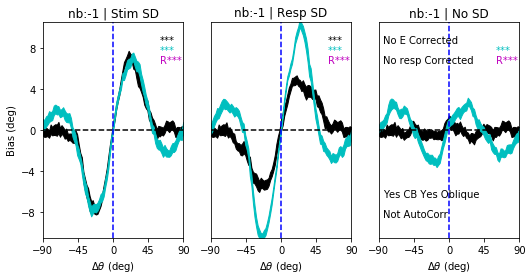

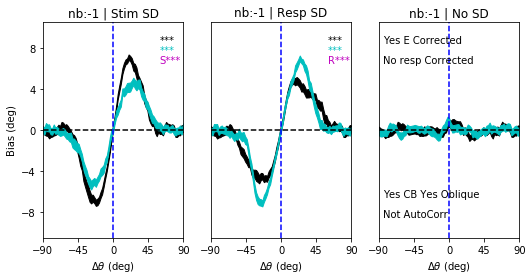

In [29]:
do_cb,do_oblique = 1,1
ann = (0,0,0,do_cb,do_oblique)
RM.vis_bias(S1[1],nb_use,stats=S1[0],ann=ann)

ann = (1,0,0,do_cb,do_oblique)
RM.vis_bias(S1c[1],nb_use,stats=S1c[0],ann=ann)
# plt.show()

## visualize encoding + correction 

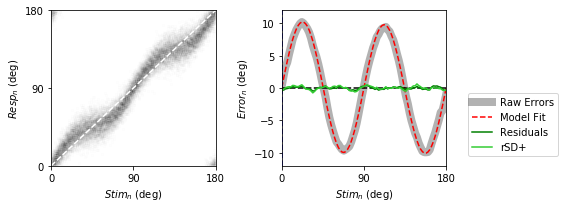

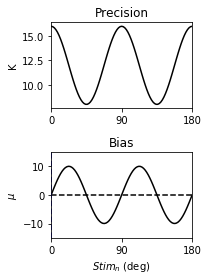

In [30]:
correction_fun,bias = RM.correct_cb(*M1,mode='fit_fun')

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(M1[0],M1[1][2],'k.',alpha=.005)
SDF.d_plot(0,0,180)
plt.ylim(0,180)
plt.xlabel('$Stim_n$ (deg)')
plt.ylabel('$Resp_n$ (deg)')
plt.plot([0,180],[0,180],'w--')
plt.yticks([0,90,180])

plt.subplot(1,2,2)

plt.plot(bns+90,bias[0],color='gray',alpha=al,linewidth=8,label='Raw Errors') # uncorrected bias
plt.plot(bns+90,correction_fun(r_bns),'r--',label='Model Fit')
SDF.d_plot(1,12,180)
plt.plot(bns+90,bias[3],'g',label='Residuals',)
# plt.plot(bns+90,bias[1],'olive',label='SD+',)  # stimulus serial dependance (present when fitting CB)
plt.plot(bns+90,bias[2],'limegreen',label='rSD+',)  # response serial dependance (present when fitting CB)
plt.legend(bbox_to_anchor=(1.1,.5))
plt.xlabel('$Stim_n$ (deg)')
plt.ylabel('$Error_n$ (deg)')
plt.tight_layout()
plt.show()

mu = RM.cb_fun_bias(bns+90)
kappa = RM.cb_fun_kappa(bns+90)
plt.figure(figsize=(3,4))
plt.subplot(2,1,1)
plt.plot(bns+90,kappa,'k')
plt.title('Precision')
plt.ylabel('K')
SDF.d_plot(0,0,180)

plt.subplot(2,1,2)
plt.plot(bns+90,mu,'k')
plt.title('Bias')
plt.ylabel('$\mu$')
# plt.legend()
SDF.d_plot(1,15,180)
plt.xlabel('$Stim_n$ (deg)')
plt.tight_layout()
plt.show()

## Box 2: why cardinal bias --> spurious bias

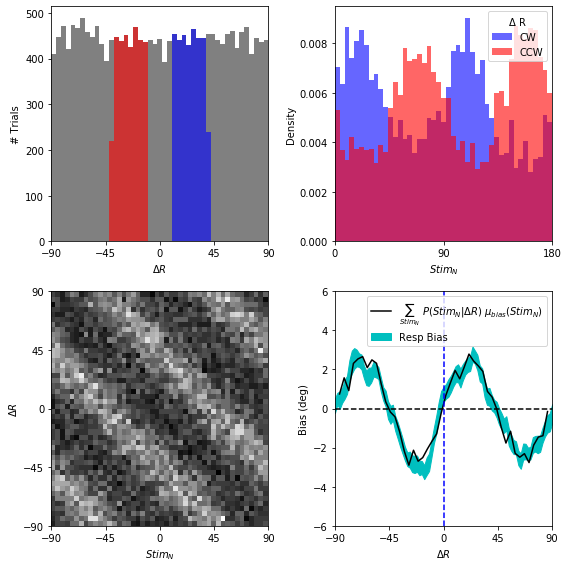

In [31]:
w_bns = np.linspace(-90,90,46)
rng_view0 = (10,40)
rng_view1 = (-40,-10)
ori_wrap = lambda x: SDF.wrap(x*2)/2

ind_use = 2 # for response generation
d_resp_this = ori_wrap(SDF.get_nb(-1,M1[1][ind_use],0)-M1[0])
d_ori_this = SDF.get_nb(-1,M1[0],1,ori_wrap)

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)

plt.hist(d_resp_this,w_bns,density=0,histtype='stepfilled',color='gray')
these_ind0 = (d_resp_this>rng_view0[0])&(d_resp_this<rng_view0[1])
these_ind1 = (d_resp_this>rng_view1[0])&(d_resp_this<rng_view1[1])
plt.hist(d_resp_this[these_ind0],w_bns,density=0,color='b',alpha=al)#,histtype='step')
plt.hist(d_resp_this[these_ind1],w_bns,density=0,color='r',alpha=al)#,histtype='step')
SDF.d_plot(0,0,-90)
plt.xlabel('$\Delta R$')
plt.ylabel('# Trials')


plt.subplot(2,2,2)
# plt.hist(stim_use,bns+90,density=0,histtype='step',color='k')
plt.hist(M1[0][these_ind0],w_bns+90,density=1,histtype='stepfilled',color='b',label='CW',alpha=al)
plt.hist(M1[0][these_ind1],w_bns+90,density=1,histtype='stepfilled',color='r',label='CCW',alpha=al)

SDF.d_plot(0,0,180)
plt.xlabel('$Stim_N$')
plt.legend(title='$\Delta$ R')
plt.ylabel('Density')

plt.subplot(2,2,3)
n_bin = 46
hh = plt.hist2d(M1[0]-90,d_resp_this,n_bin,cmap='gray',density=1) # gist_yarg
plt.ylabel('$\Delta R$')
plt.xlabel('$Stim_N$')
SDF.d_plot(0,0,-90)
plt.yticks([-90,-45,0,45,90])


plt.subplot(2,2,4)
norm_resp_dist = np.divide(hh[0],np.sum(hh[0].T,1)).T # normalized Resp hist for given dR bin
bns_s = np.linspace(-90,90,n_bin+2)[1:-1]
u_bns = RM.cb_fun_bias(bns_s) # bias for given mu bin
pred_bias = norm_resp_dist@u_bns

plt.plot(bns_s,pred_bias,'k',label='$\sum_{Stim_N}~ P(Stim_N|\Delta R)~\mu_{bias}(Stim_N)$')
SDF.sem_plot(bns,S1[1][0,1,2],color='c',label='Resp Bias')
SDF.d_plot(1,6,-90)
plt.xlabel('$\Delta R$')
plt.ylabel('Bias (deg)')
plt.legend()
plt.tight_layout()
plt.show()



# Autocorrelations
- impact of having autocorrelated stimulus sequences

In [32]:
do_cb,do_oblique = 1,1
M_ac1 = RM.run_simulation(20000,kappa=8,p_same=0.8,do_cb=do_cb,do_oblique=do_oblique,do_stim_autocorr=1) 
M_ac2 = RM.run_simulation(20000,kappa=8,p_same=0.8,do_cb=do_cb,do_oblique=do_oblique,do_stim_autocorr=2) 

M_ac1_c = RM.correct_cb(*M_ac1,mode='E',n_subj=n_subj,n_trial=n_trial)
M_ac2_c = RM.correct_cb(*M_ac2,mode='E',n_subj=n_subj,n_trial=n_trial)

###  visualzie d_ori

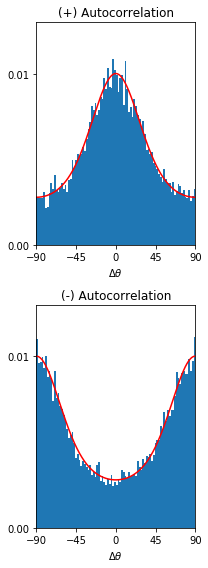

In [33]:
ac_fun1 = RM.cf(s_0,90,1,.7)
ac_fun2 = RM.cf(s_0,0,1,.7)
d_M_ac1 = SDF.get_nb(-1,M_ac1[0],1,ori_wrap)
d_M_ac2 = SDF.get_nb(-1,M_ac2[0],1,ori_wrap)

yl= (0,0.013)
plt.figure(figsize=(3,8))
plt.subplot(2,1,1)
plt.hist(d_M_ac1,bns,density=1)
plt.plot(s_0-90,ac_fun1/90*pi,'r')
plt.ylim(yl)
plt.yticks([0,.01])
SDF.d_plot(0,0,-90)
plt.xlabel('$\Delta \\theta$')
plt.title('(+) Autocorrelation')

plt.subplot(2,1,2)

plt.hist(d_M_ac2,bns,density=1)
plt.plot(s_0-90,ac_fun2/90*pi,'r')
plt.ylim(yl)
SDF.d_plot(0,0,-90)
# plt.yticks([])
# plt.yticks([0,.005,.01])
plt.yticks([0,.01])
plt.xlabel('$\Delta \\theta$')
plt.title('(-) Autocorrelation')
plt.tight_layout()
plt.show()

### visualize autocorrelated stimuli model output
- mostly concerned with showing no spurious attraction when no SD...

In [34]:
nb_use = (-1,0)
S_ac1 = RM.summarize_sim(*M_ac1_c,get_vis=1,nb_run=nb_use,fit_typ=mdl_fun,n_subj=n_subj,n_trial=n_trial)
S_ac2 = RM.summarize_sim(*M_ac2_c,get_vis=1,nb_run=nb_use,fit_typ=mdl_fun,n_subj=n_subj,n_trial=n_trial)

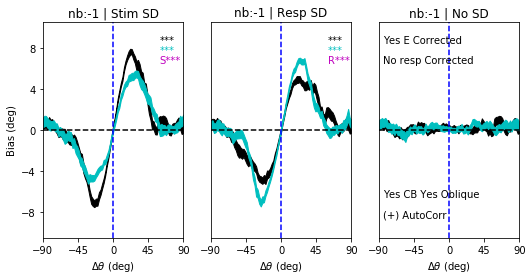

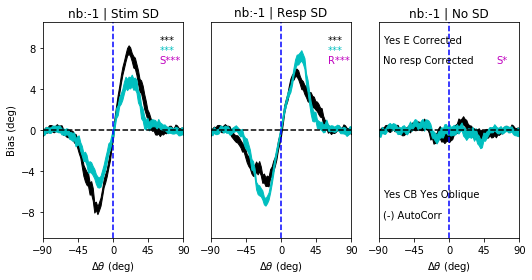

In [35]:
ann = (1,0,1,do_cb,do_oblique)
nb_vis = (-1,)
RM.vis_bias(S_ac1[1][:1],nb_vis,stats=S_ac1[0],ann=ann)

ann = (1,0,2,do_cb,do_oblique)
RM.vis_bias(S_ac2[1][:1],nb_vis,stats=S_ac2[0],ann=ann)

# Alternative Cardinal Bias Corrections
- visualize the impact of using "poor" corrections for cardinal bias. [x]
- add sine and sawtooth functions [x]
- implement sawtooth function @ encoding. [x]

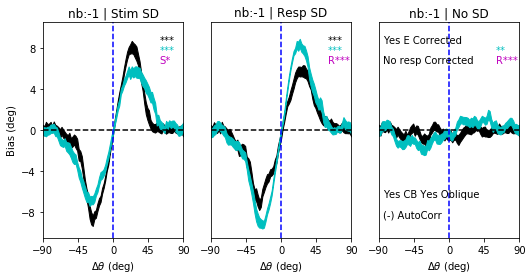

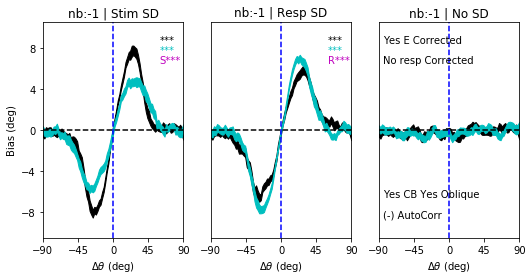

In [36]:
# sawtooth CB
# - see no spurious SD even when using "wrong" correction fun...
do_cb,do_oblique = 2,1
M_st = RM.run_simulation(20000,kappa=8,p_same=0.8,do_cb=do_cb,do_oblique=do_oblique,) 
M_st_c = RM.correct_cb(*M_st,mode='E',n_subj=n_subj,n_trial=n_trial)

nb_vis = (-1,)
S_st1 = RM.summarize_sim(*M_st,get_vis=1,nb_run=nb_vis,fit_typ=mdl_fun)
S_st1_c = RM.summarize_sim(*M_st_c,get_vis=1,nb_run=nb_vis,fit_typ=mdl_fun)
RM.vis_bias(S_st1[1],nb_vis,stats=S_st1[0],ann=ann)
RM.vis_bias(S_st1_c[1],nb_vis,stats=S_st1_c[0],ann=ann)

## Cardinal Bias correction by subject (noisier)
- seems to still work out pretty well.

ignoring nan values!
ignoring nan values!
ignoring nan values!
ignoring nan values!
ignoring nan values!
ignoring nan values!
ignoring nan values!
ignoring nan values!
ignoring nan values!
ignoring nan values!
ignoring nan values!
ignoring nan values!


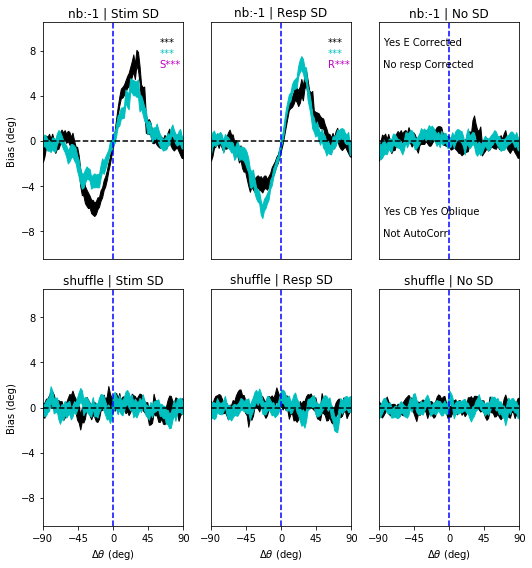

In [323]:
_n_subj,_n_trial = 60,90
M1c_by_subj = RM.correct_cb(*M1,mode='E',
                            n_subj=_n_subj,n_trial=_n_trial)
nb_vis = (-1,0)
S1c_by_subj = RM.summarize_sim(*M1c_by_subj,get_vis=1,nb_run=nb_vis,fit_typ=mdl_fun,
                              n_subj=_n_subj,n_trial=_n_trial)
RM.vis_bias(S1c_by_subj[1],nb_vis,stats=S1c_by_subj[0],ann=ann)

# Joint Fits

## Stimulus repulsion 

In [37]:
do_cb,do_oblique = 1,1
M2 = RM.run_simulation(20000,kappa=8,p_same=0.8,do_cb=do_cb,do_oblique=do_oblique,adapt_amp=6) 


M2c = RM.correct_cb(*M2,mode='E',n_subj=n_subj,n_trial=n_trial)
nb_use = (-1,0)
S2 = RM.summarize_sim(*M2,get_vis=1,nb_run=nb_use,fit_typ=mdl_fun,
                      n_subj=n_subj,n_trial=n_trial)
S2c = RM.summarize_sim(*M2c,get_vis=1,nb_run=nb_use,fit_typ=mdl_fun,
                       n_subj=n_subj,n_trial=n_trial)



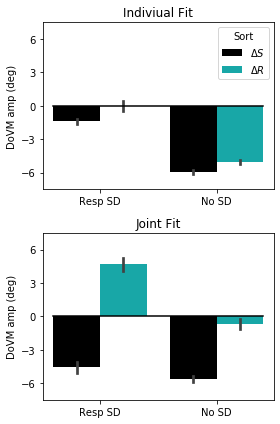

In [38]:
# vis stim/resp SD
do_vertical = 1

stats = S1c[0] # S1[0]
yl = (0,7.5)

# vis with stim repulsion
stats = S2c[0][(S2c[0].trueSD!='Stim SD')] # S1[0]
# stats = S2c_s[0][(S2c_s[0].trueSD!='Stim SD')] # S1[0]
yl = (-7.5,7.5)

joint_labs = ('joint_ori','joint_resp')
new_labels = ['$\Delta S$','$\Delta R$']
nb_vis = -1


if do_vertical:
    plt.figure(figsize=(4,6))
    sub_inds = (2,1)
else:
    plt.figure(figsize=(6,3))
    sub_inds = (1,2)
    
plt.subplot(*sub_inds,1)
g = sns.barplot(data=stats[~np.isin(stats.dStim,joint_labs)&(stats.nb==nb_vis)],x='trueSD',
              y='amp',hue='dStim',palette=pal,ci=68)
g.legend_.set_title('Sort')
plt.ylabel('DoVM amp (deg)')
plt.ylim(yl)
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)
plt.title('Indiviual Fit')
plt.plot([-.4,2.4-do_vertical],[0,0],'k')
if do_vertical:
    plt.yticks([-6,-3,0,3,6])
else:
    plt.yticks([0,2,4,6])
plt.xlabel('')

plt.subplot(*sub_inds,2)
g = sns.barplot(data=stats[np.isin(stats.dStim,joint_labs)&(stats.nb==nb_vis)],x='trueSD',
              y='amp',hue='dStim',palette=pal,ci=68)
if do_vertical:
    plt.ylabel('DoVM amp (deg)')
    plt.yticks([-6,-3,0,3,6])
else:
    plt.ylabel('')
    plt.yticks([])
# plt.ylabel('')
# g.legend_.set_title('Sort')
g.legend_.remove()
# for t, l in zip(g.legend_.texts, new_labels):
#     t.set_text(l)
plt.title('Joint Fit')
plt.ylim(yl)
# plt.plot([-.4,1.4],[0,0],'k')
plt.plot([-.4,2.4-do_vertical],[0,0],'k')

plt.xlabel('')
plt.tight_layout()
plt.show()

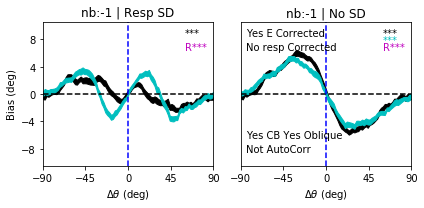

In [39]:
ann = (1,0,0,do_cb,do_oblique)
nb_use = (-1,)
RM.vis_bias(S2c[1][:1,:,1:],nb_use,stats=S2c[0],ann=ann,labs=('Resp SD','No SD'),set_fs=(6,3))
# RM.vis_bias(fit_traces_cb_corrected,nb_use,stats=fit_stats_cb_corrected,ann=ann)
# RM.vis_bias(S2c[1][:,:,1:],nb_use,stats=S2c[0],ann=ann,labs=('Resp SD','No SD'))

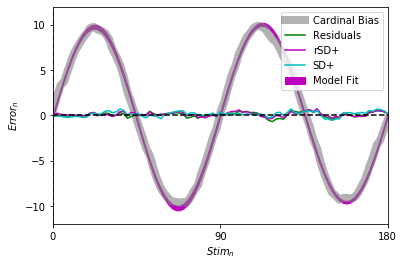

In [58]:

# correction_fun,bias = RM.correct_cb(*M2,mode='fit_fun',c_fun='sine',n_subj=n_subj,n_trial=n_trial)
# correction_fun,bias = RM.correct_cb(*M2,mode='fit_fun',c_fun='sawtooth',n_subj=n_subj,n_trial=n_trial)
correction_fun,bias = RM.correct_cb(*M2,mode='fit_fun',c_fun='fourier',n_subj=n_subj,n_trial=n_trial)

plt.plot(bns+90,bias[0],color='gray',alpha=al,linewidth=8,label='Cardinal Bias') # uncorrected bias
if n_subj:
    fits_all = np.zeros((n_subj,n_bns))
    for fi,f in enumerate(correction_fun):
        fits_all[fi] = f(r_bns)
    SDF.sem_plot(bns+90,fits_all,color='m',label='Model Fit')
else:
    plt.plot(bns+90,correction_fun[4](r_bns),'m--',label='Model Fit')

plt.plot(bns+90,bias[3],'g',label='Residuals',)
plt.plot(bns+90,bias[2],'m',label='rSD+',)
plt.plot(bns+90,bias[1],'c',label='SD+',)
SDF.d_plot(1,12,180)
plt.legend()
plt.xlabel('$Stim_n$')
plt.ylabel('$Error_n$')
plt.show()

## Power analysis joint fitting
- want to vary variance & n-trials/subj
- note that currently correcting using all trials, not by subject

In [504]:
#- want to add subject specific cardinal bias correction...

In [858]:
nb_run = (-1,0)
do_cb,do_oblique = 1,1
p_same = 0.8
# kappa_try = 2**np.arange(1,6)
kappa_try = np.round(2**np.arange(1,5.9,.5)).astype(int)
n_trials_sim = np.array([90,180,270,360]) # 720
n_trials_sim = np.array([90,180,360]) # 720
n_subj = 30#120
sub_labs = ('stim_repel','kappa','p_same','n_trial')

n_trials_total = n_subj*np.max(n_trials_sim)

stats_all = pd.DataFrame()
for kk in kappa_try:
    print(kk)
    mdl_sim = RM.run_simulation(n_trials_total,kappa=kk,p_same=p_same,do_cb=do_cb,
                                do_oblique=do_oblique,adapt_amp=0)
    
    mdl_sim_repel = RM.run_simulation(n_trials_total,kappa=kk,p_same=p_same,do_cb=do_cb,
                                      do_oblique=do_oblique,adapt_amp=6)

    for n_trial in n_trials_sim:
        mdl_corrected       = RM.correct_cb(*mdl_sim,mode='E',n_subj=n_subj,n_trial=n_trial)
        mdl_repel_corrected = RM.correct_cb(*mdl_sim_repel,mode='E',n_subj=n_subj,n_trial=n_trial)
        
        stats_c = RM.summarize_sim(*mdl_corrected,nb_run=nb_run,n_subj=n_subj,n_trial=n_trial)
        stats_repel_c = RM.summarize_sim(*mdl_repel_corrected,nb_run=nb_run,n_subj=n_subj,n_trial=n_trial)
        for label,item in zip(sub_labs,((0,1),(kk,kk),(p_same,p_same),(n_trial,n_trial))):
            stats_c[label],stats_repel_c[label] = item
            
        stats_all = pd.concat((stats_all,stats_c,stats_repel_c))

2
3
4
6
8
11
16
23
32
45


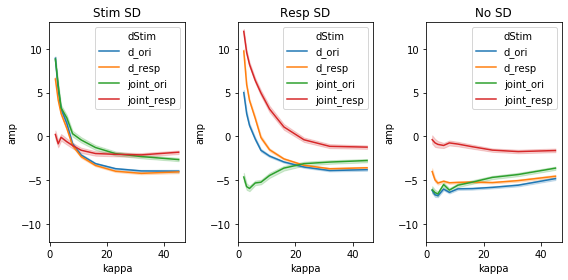

In [860]:
these_sources = ('Stim SD','Resp SD','No SD')
yl = (-12,13)
plt.figure(figsize=(8,4))
for i,this_source in enumerate(these_sources):
    plt.subplot(1,len(these_sources),i+1)
    plt.title(this_source)
    sns.lineplot(data=stats_all[(stats_all.nb==-1)&(~np.isnan(stats_all.kappa))&
                                (stats_all.trueSD==this_source)&(stats_all.stim_repel==1)]
                 ,x='kappa',y='amp',hue='dStim')
    plt.ylim(yl)
plt.tight_layout()

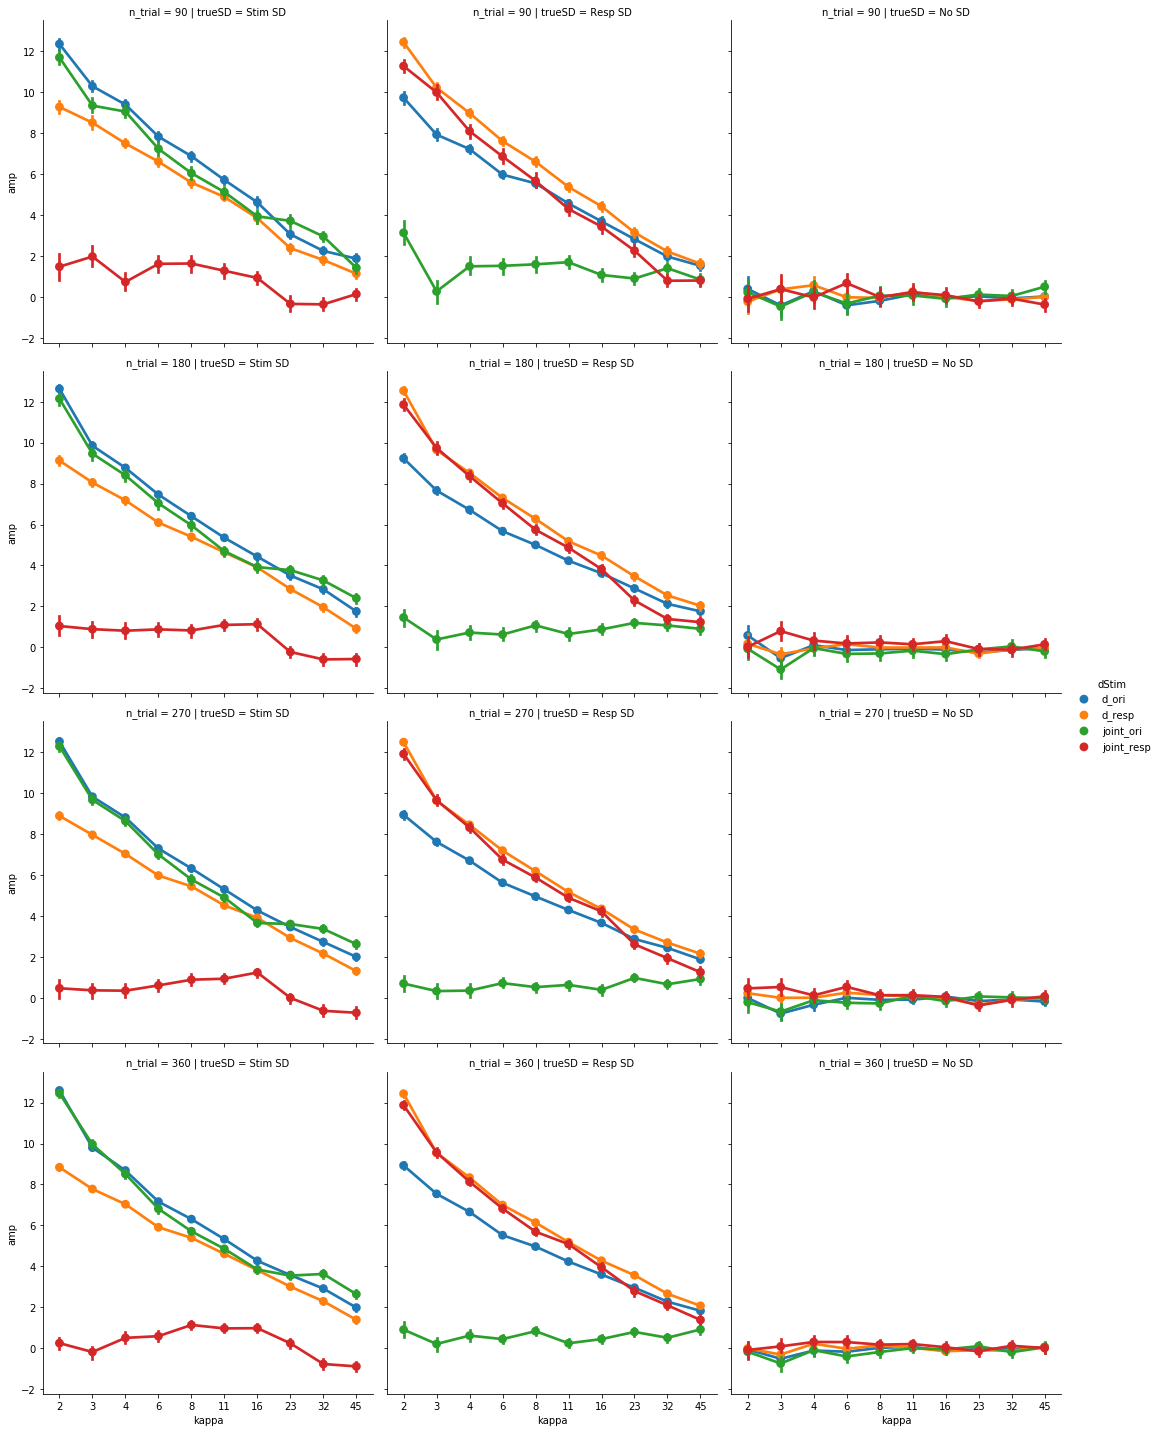

In [861]:
sns.catplot(data=stats_all[(stats_all.nb==-1)&(~np.isnan(stats_all.kappa))&
                                (stats_all.stim_repel==0)]
                 ,x='kappa',y='amp',hue='dStim',row='n_trial',col='trueSD',kind='point',ci=68)

### lets look at just full power (360 trials) and see what proportion of subjects have
- d_ori>d_resp
- joint_ori>joint_resp
- all >0

In [565]:
these_ind = (stats_all.nb==-1)
stats_all['d_amp'] = np.nan
d_sep = stats_all[(stats_all.dStim=='d_ori')].amp.values - stats_all[(stats_all.dStim=='d_resp')].amp.values
d_joint = stats_all[(stats_all.dStim=='joint_ori')].amp.values - stats_all[(stats_all.dStim=='joint_resp')].amp.values
stats_all.loc[(stats_all.dStim=='d_ori'),'d_amp'] = d_sep
stats_all.loc[(stats_all.dStim=='joint_ori'),'d_amp'] = d_joint


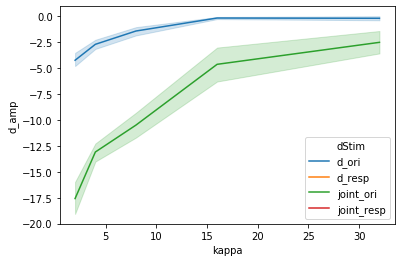

In [571]:
this_source = these_sources[1]
stats_use = stats_all[(stats_all.nb==-1)&(~np.isnan(stats_all.kappa))&
                      (stats_all.stim_repel==1)&(stats_all.n_trial==360)&
                      (stats_all.trueSD==this_source)]
# sns.lineplot(data=stats_use,x='kappa',y='amp',hue='dStim')
sns.lineplot(data=stats_use,x='kappa',y='d_amp',hue='dStim')
plt.show()

In [602]:

def d2p(d,n=30,z_alpha = 1.645):
    z_beta = z_alpha - np.abs(d)*np.sqrt(n)
    prob = scipy.stats.norm().cdf(-z_beta)
    return prob

In [872]:
# power analysis
# z_alpha = 1.645
z_alpha = 3 # large: 3SD ~ p=.001
n=30
nb_view = -1
d_power_mat = np.zeros((2,3,len(kappa_try),2))  # ind/joint, stim/resp/noSD, kappa, (no)adapt,
power_mat = np.zeros((2,2,3,len(kappa_try),2))  # ind/joint, dS/dR, stim/resp/noSD, kappa, (no)adapt,

for mi,mode in enumerate(('d','joint')):
    for ii,trueSD in enumerate(these_sources):
        for ki,k in enumerate(kappa_try):
            for ai in range(2):
                these_ind = ((stats_all.stim_repel==ai)&(np.round(stats_all.p_same,1)==p_same)&
                             (stats_all.trueSD==trueSD)&(stats_all.nb==nb_view)&(stats_all.kappa==k)&
                             (stats_all.n_trial>=90))
                amps  = [stats_all.loc[these_ind&(stats_all.dStim==mode+d),'amp'].values for d in ('_ori','_resp')]
                d = (np.mean(amps[0])-np.mean(amps[1]))/np.std(np.c_[amps])

                d_power_mat[mi,ii,ki,ai] = d2p(d,n,z_alpha)
                ds = [np.mean(a)/np.std(a) for a in amps]
                power_mat[mi,:,ii,ki,ai] = [d2p(d,n,z_alpha) for d in ds] 

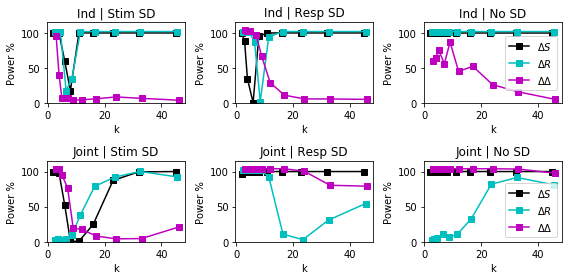

In [874]:
do_adapt = 1
inc_d_stats = 1
yl = (0,115)
plt.figure(figsize=(8,4))
for i in range(2):
    for j in range(3):
#         plt.subplot(3,2,i+1+j*2)
        plt.subplot(2,3,i*3+1+j)
        plt.plot(kappa_try,power_mat[i,0,j,:,do_adapt].T*100,'ks-',)
        plt.plot(kappa_try+.5,power_mat[i,1,j,:,do_adapt].T*100+2,'cs-',)
        if inc_d_stats:
            plt.plot(kappa_try+1,d_power_mat[i,j,:,do_adapt].T*100+4,'ms-')
        plt.title('%s | %s' %(('Ind','Joint')[i],these_sources[j]))
        plt.ylim(yl)
#         if (i+j)==do_adapt: # hack... since cropping first column with stim adapt
        plt.xlabel('k')
        plt.ylabel('Power %')
        if j==2:
            plt.legend(('$\Delta S$','$\Delta R$','$\Delta \Delta$'))
plt.tight_layout()
plt.show()